In [10]:
import sys
import cv2
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.rtmpose.model import RTMPoseModel
from rtmlib import draw_skeleton
import copy 

In [11]:
import cv2
import numpy as np

def adjust_gamma(image, gamma=1.0):
    # Construir la tabla de búsqueda
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    
    # Aplicar la corrección de gamma usando la tabla de búsqueda
    return cv2.LUT(image, table)
def log_transform_rgb(image, c=1.0):
    # Convertir la imagen a float32 y normalizar a [0, 1]
    image_float = image.astype(np.float32) / 255.0
    
    # Aplicar la transformación logarítmica a cada canal
    image_log = c * np.log(image_float + 1)
    
    # Escalar los valores de píxel al rango [0, 255]
    image_log = np.clip(image_log * 255, 0, 255).astype(np.uint8)
    
    return image_log

def adjust_brightness_rgb(image, gamma=1.0):
    # Convertir la imagen a float32 y normalizar a [0, 1]
    image_float = image.astype(np.float32) / 255.0
    
    # Aplicar la transformación exponencial inversa a cada canal
    image_adjusted = np.power(image_float, gamma)
    
    # Escalar los valores de píxel al rango [0, 255]
    image_adjusted = (image_adjusted * 255).astype(np.uint8)
    
    return image_adjusted

In [27]:
kpt_thr = 5.5
model = RTMPoseModel(filtering=True,mode='robust',backend='onnxruntime',threshold=kpt_thr)

import time

# define a video capture object 
vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/wlasl-complete/videos/17165.mp4")#68508.mp4")#54563.mp4")#68914.mp4") 

vid = cv2.VideoCapture(0)
cv2.namedWindow("frame", cv2.WINDOW_NORMAL) 

while(True): 
    
    ret, frame = vid.read() 
    if ret is None or frame is None:
        break

    #gamma = 0.45
    #frame = adjust_gamma(frame, gamma)
    gamma = 1.3# Ajusta este valor según tus necesidades
    frame = adjust_brightness_rgb(frame, gamma)
    #c = 0.85 # Constante de escala
    #frame = log_transform_rgb(frame, c)
    frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

    keypoints, scores  = model.predict(frame_rgb)

    frame = draw_skeleton(frame, keypoints, scores, kpt_thr=kpt_thr,
                                line_width=3,radius=3)
    # Display the resulting frame 
    cv2.imshow('frame', frame) 

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
    
    #qqqqqqqqqqtime.sleep(0.5)

# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 


onnx_model: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/onnx_sdk/yolox_m_8xb8-300e_humanart-c2c7a14a.zip
onnx_model: /home/cristian/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx
load /home/cristian/.cache/rtmlib/hub/checkpoints/yolox_m_8xb8-300e_humanart-c2c7a14a.onnx with onnxruntime backend
onnx_model: /media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Pruebas_antiguas/RTMPOSE/juxtapose/model/rtmpose-x.onnx
onnx_model: /media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Pruebas_antiguas/RTMPOSE/juxtapose/model/rtmpose-x.onnx


2024-05-11 13:10:55.434340654 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-05-11 13:10:55.434357429 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.
2024-05-11 13:10:55.674122115 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-05-11 13:10:55.674136074 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunning with verbose output on a non-minimal build will show node assignments.


load /media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Pruebas_antiguas/RTMPOSE/juxtapose/model/rtmpose-x.onnx with onnxruntime backend


In [13]:
print(frame_rgb.shape)

(480, 640, 3)


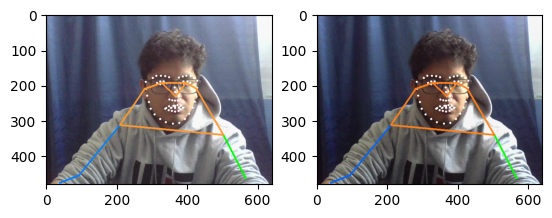

In [21]:
import matplotlib.pyplot as plt
import copy


frame_test = copy.deepcopy(frame)
gamma = 0.75
frame_test = adjust_gamma(frame_test, gamma)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(frame_test,cv2.COLOR_BGR2RGB))
plt.show()

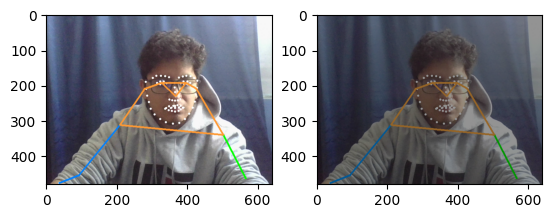

In [25]:
frame_test = copy.deepcopy(frame)
c = 0.85 # Constante de escala
frame_test = log_transform_rgb(frame_test, c)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(frame_test,cv2.COLOR_BGR2RGB))
plt.show()


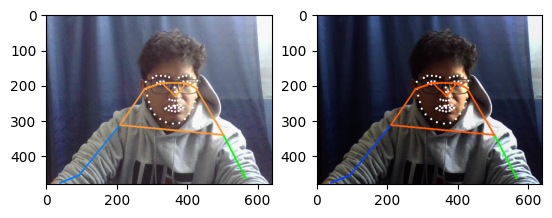

In [16]:

frame_test = copy.deepcopy(frame)
gamma = 2# Ajusta este valor según tus necesidades
frame_test = adjust_brightness_rgb(frame_test, gamma)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(frame_test,cv2.COLOR_BGR2RGB))
plt.show()
